Zajmuję się wyświetleniem i opracowaniem russian metadata.

In [1]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# pip install openpyxl

In [3]:
rmetadata = pd.read_excel("SupplementaryTableS1.xlsx",
                          skiprows=3)

rmetadata.head()

,Unnamed: 0,"Age, y.o.",Sex,Diagnosis,CES-D,GAD-7,HAMD-17,"BMI, kg/m2","Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,HC_1,45,Male,Healthy,17,10,8,28,8.978004,77234300,611321,475.23,1415,548.45
1,HC_2,44,Male,Healthy,10,4,5,30,8.037045,68444164,547126,414.53,1232,648.94
2,HC_3,18,Male,Healthy,0,0,0,-,8.031857,67588818,235013,230.52,2571,421.60
3,HC_4,33,Male,Healthy,1,3,4,26,7.804608,66208170,343919,326.67,2287,525.38
4,HC_5,24,Female,Healthy,11,2,0,22,7.530154,64400800,230896,221.66,2952,488.86


In [4]:
rmetadata.shape

(74, 14)

In [5]:
rmetadata.columns

Index(['Unnamed: 0', 'Age, y.o.', 'Sex', 'Diagnosis', 'CES-D', 'GAD-7',
       'HAMD-17', 'BMI, kg/m2', 'Size, Gbp.', 'Number of reads',
       'Number of contigs', 'Assembly length, Mbp.', 'N50, b.p.',
       'Maximum contig length, kbp.'],
      dtype='object')

In [6]:
pd.set_option('display.max_rows', None)

print(rmetadata["Diagnosis"].value_counts())

Diagnosis
Healthy    38
F33.2      10
F33.1       8
F32.2       8
F32.1       6
F33.3       2
F32.3       1
F31.3       1
Name: count, dtype: int64


In [7]:
rmetadata = rmetadata.rename(columns={'Unnamed: 0': 'sample_id', 'Sex': 'gender', 'Age, y.o.': 'age', 'Diagnosis': 'disease', 'BMI, kg/m2': 'BMI'})

In [8]:
rmetadata.insert(0, 'study_name', 'russian_data')

In [9]:
rmetadata.head()

,study_name,sample_id,age,gender,disease,CES-D,GAD-7,HAMD-17,BMI,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,russian_data,HC_1,45,Male,Healthy,17,10,8,28,8.978004,77234300,611321,475.23,1415,548.45
1,russian_data,HC_2,44,Male,Healthy,10,4,5,30,8.037045,68444164,547126,414.53,1232,648.94
2,russian_data,HC_3,18,Male,Healthy,0,0,0,-,8.031857,67588818,235013,230.52,2571,421.60
3,russian_data,HC_4,33,Male,Healthy,1,3,4,26,7.804608,66208170,343919,326.67,2287,525.38
4,russian_data,HC_5,24,Female,Healthy,11,2,0,22,7.530154,64400800,230896,221.66,2952,488.86


In [10]:
rmetadata.columns

Index(['study_name', 'sample_id', 'age', 'gender', 'disease', 'CES-D', 'GAD-7',
       'HAMD-17', 'BMI', 'Size, Gbp.', 'Number of reads', 'Number of contigs',
       'Assembly length, Mbp.', 'N50, b.p.', 'Maximum contig length, kbp.'],
      dtype='object')

In [11]:
rmetadata.head()

,study_name,sample_id,age,gender,disease,CES-D,GAD-7,HAMD-17,BMI,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,russian_data,HC_1,45,Male,Healthy,17,10,8,28,8.978004,77234300,611321,475.23,1415,548.45
1,russian_data,HC_2,44,Male,Healthy,10,4,5,30,8.037045,68444164,547126,414.53,1232,648.94
2,russian_data,HC_3,18,Male,Healthy,0,0,0,-,8.031857,67588818,235013,230.52,2571,421.60
3,russian_data,HC_4,33,Male,Healthy,1,3,4,26,7.804608,66208170,343919,326.67,2287,525.38
4,russian_data,HC_5,24,Female,Healthy,11,2,0,22,7.530154,64400800,230896,221.66,2952,488.86


In [12]:
rmetadata['disease'] = rmetadata['disease'].replace('F33.3', 'depression')
rmetadata['disease'] = rmetadata['disease'].replace('F33.2', 'depression')
rmetadata['disease'] = rmetadata['disease'].replace('F33.1', 'depression')
rmetadata['disease'] = rmetadata['disease'].replace('F32.3', 'depression_epizode')
rmetadata['disease'] = rmetadata['disease'].replace('F32.2', 'depression_epizode')
rmetadata['disease'] = rmetadata['disease'].replace('F32.1', 'depression_epizode')
rmetadata['disease'] = rmetadata['disease'].replace('F31.3', 'manic_depression_bipolar')

In [13]:
rmetadata

,study_name,sample_id,age,gender,disease,CES-D,GAD-7,HAMD-17,BMI,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp."
0,russian_data,HC_1,45,Male,Healthy,17,10,8,28,8.978004,77234300,611321,475.23,1415,548.45
1,russian_data,HC_2,44,Male,Healthy,10,4,5,30,8.037045,68444164,547126,414.53,1232,648.94
2,russian_data,HC_3,18,Male,Healthy,0,0,0,-,8.031857,67588818,235013,230.52,2571,421.60
3,russian_data,HC_4,33,Male,Healthy,1,3,4,26,7.804608,66208170,343919,326.67,2287,525.38
4,russian_data,HC_5,24,Female,Healthy,11,2,0,22,7.530154,64400800,230896,221.66,2952,488.86
5,russian_data,HC_6,24,Female,Healthy,9,3,3,22,7.549139,63538790,500259,395.22,1503,606.80
6,russian_data,HC_7,24,Male,Healthy,5,1,3,23,7.246634,61801170,417686,326.72,1381,685.30
7,russian_data,HC_8,29,Female,Healthy,6,2,2,19,7.470154,65685486,408586,349.88,1949,591.12
8,russian_data,HC_9,25,Female,Healthy,5,3,3,18,6.978883,62181548,271082,236.37,1969,328.64
9,russian_data,HC_10,25,Female,Healthy,0,2,3,23,7.356419,65674262,484405,373.48,1327,369.46


In [14]:
pd.set_option('display.max_rows', None)

print(rmetadata["disease"].value_counts())

disease
Healthy                     38
depression                  20
depression_epizode          15
manic_depression_bipolar     1
Name: count, dtype: int64


In [15]:
import numpy as np
rmetadata["BMI"] = rmetadata["BMI"].replace("-", np.nan)

/tmp/ipykernel_1204161/4028624085.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rmetadata["BMI"] = rmetadata["BMI"].replace("-", np.nan)


In [16]:
rmetadata["NCBI_accession"] = None 

In [17]:
# mapping sample_id → NCBI accession
mapping = {
    "HC_1": "SRR15966663",
    "HC_2": "SRR15966662",
    "HC_3": "SRR15966661",
    "HC_4": "SRR15966660",
    "HC_5": "SRR15966659",
    "HC_6": "SRR15966658",
    "HC_7": "SRR15966656",
    "HC_8": "SRR15966655",
    "HC_9": "SRR15966654",
    "HC_10": "SRR15966653",
    "HC_11": "SRR15966652",
    "HC_12": "SRR15966651",
    "HC_13": "SRR15966650",
    "HC_14": "SRR15966649",
    "HC_15": "SRR15966648",
    "HC_16": "SRR16681849",
    "HC_17": "SRR16681848",
    "HC_18": "SRR16681847",
    "HC_19": "SRR16681846",
    "HC_20": "SRR16681845",
    "HC_21": "SRR16681844",
    "HC_22": "SRR16681843",
    "HC_23": "SRR16681842",
    "HC_24": "SRR16681840",
    "HC_25": "SRR16681839",
    "HC_27": "SRR16681838",
    "HC_28": "SRR16681837",
    "HC_30": "SRR16681836",
    "HC_31": "SRR16681835",
    "HC_32": "SRR16681834",
    "HC_33": "SRR16681833",
    "HC_34": "SRR16681832",
    "HC_35": "SRR16681831",
    "HC_36": "SRR16681829",
    "HC_37": "SRR16681828",
    "HC_38": "SRR16681827",
    "HC_39": "SRR16681826",
    "HC_40": "SRR16681825",
    "PwD_2": "SRR15966669",
    "PwD_3": "SRR15966668",
    "PwD_4": "SRR15966657",
    "PwD_5": "SRR15966647",
    "PwD_6": "SRR15966646",
    "PwD_7": "SRR15966645",
    "PwD_8": "SRR15966644",
    "PwD_9": "SRR15966643",
    "PwD_10": "SRR15966642",
    "PwD_11": "SRR15966641",
    "PwD_12": "SRR15966667",
    "PwD_13": "SRR15966666",
    "PwD_14": "SRR15966665",
    "PwD_15": "SRR15966664",
    "PwD_16": "SRR16681864",
    "PwD_17": "SRR16681863",
    "PwD_18": "SRR16681852",
    "PwD_19": "SRR16681841",
    "PwD_20": "SRR16681830",
    "PwD_21": "SRR16681824",
    "PwD_22": "SRR16681823",
    "PwD_23": "SRR16681822",
    "PwD_24": "SRR16681821",
    "PwD_25": "SRR16681820",
    "PwD_26": "SRR16681862",
    "PwD_27": "SRR16681861",
    "PwD_28": "SRR16681860",
    "PwD_29": "SRR16681859",
    "PwD_30": "SRR16681858",
    "PwD_31": "SRR16681857",
    "PwD_32": "SRR16681856",
    "PwD_33": "SRR16681855",
    "PwD_34": "SRR16681854",
    "PwD_35": "SRR16681853",
    "PwD_36": "SRR16681851",
    "PwD_37": "SRR16681850",
}


rmetadata["NCBI_accession"] = rmetadata["sample_id"].map(mapping)


In [18]:
rmetadata.head()

,study_name,sample_id,age,gender,disease,CES-D,GAD-7,HAMD-17,BMI,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp.",NCBI_accession
0,russian_data,HC_1,45,Male,Healthy,17,10,8,28.0,8.978004,77234300,611321,475.23,1415,548.45,SRR15966663
1,russian_data,HC_2,44,Male,Healthy,10,4,5,30.0,8.037045,68444164,547126,414.53,1232,648.94,SRR15966662
2,russian_data,HC_3,18,Male,Healthy,0,0,0,NaN,8.031857,67588818,235013,230.52,2571,421.60,SRR15966661
3,russian_data,HC_4,33,Male,Healthy,1,3,4,26.0,7.804608,66208170,343919,326.67,2287,525.38,SRR15966660
4,russian_data,HC_5,24,Female,Healthy,11,2,0,22.0,7.530154,64400800,230896,221.66,2952,488.86,SRR15966659


In [19]:
rmetadata.to_csv('processed_ru.csv', index=False)

In [20]:
has_depression = rmetadata[rmetadata["disease"] == "depression"]
no_depression = rmetadata[rmetadata["disease"] == "Healthy"]

print(f"Liczba osób z depresją: {len(has_depression)}")
print(f"Liczba osób bez depresji: {len(no_depression)}")

Liczba osób z depresją: 20
Liczba osób bez depresji: 38


In [21]:
import matplotlib.pyplot as plt

/home/PaulinaSk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


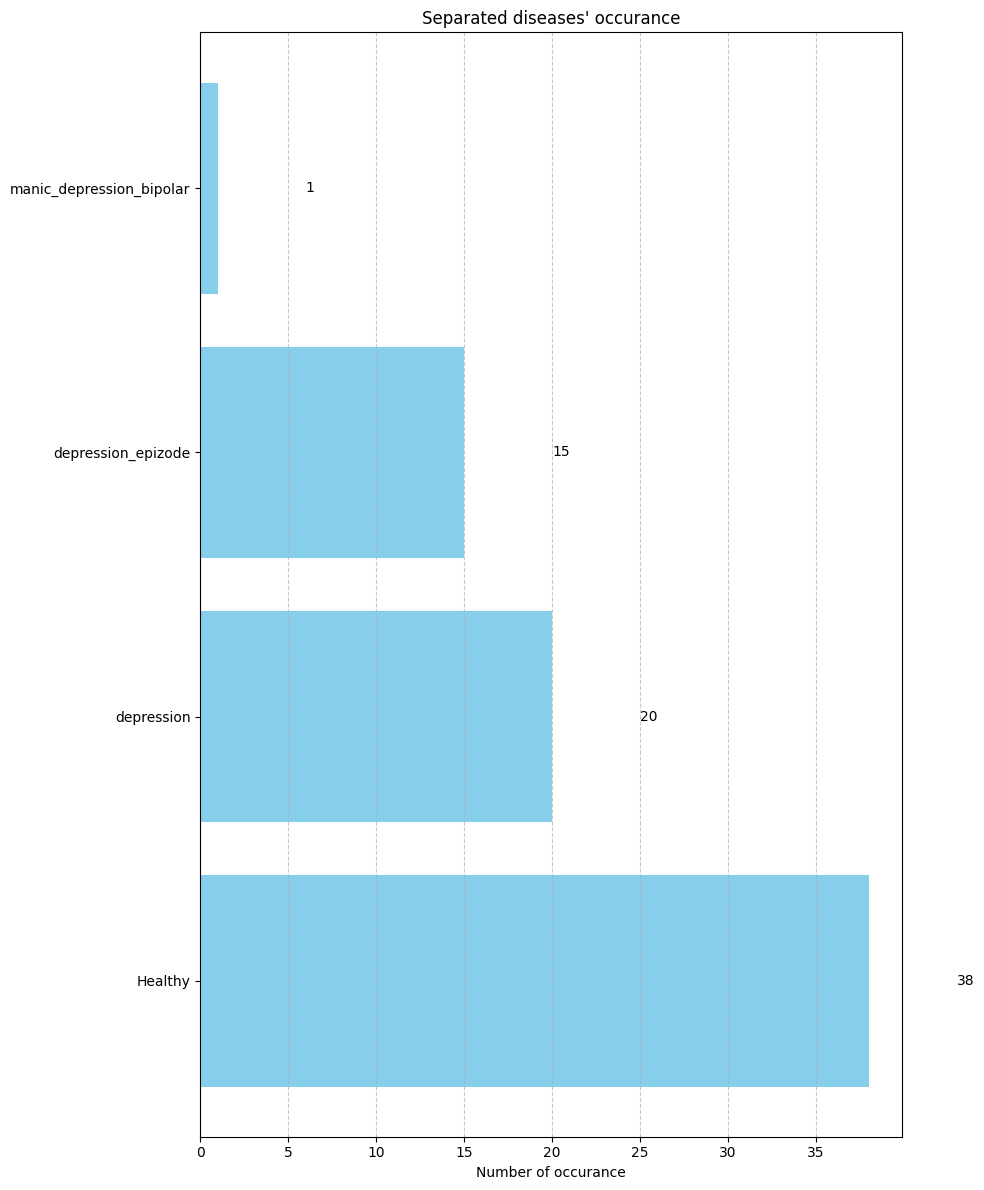

In [22]:
all_diseases = rmetadata["disease"].dropna().str.split(";").explode()

disease_counts = all_diseases.value_counts()

plt.figure(figsize=(10, 12))
bars = plt.barh(disease_counts.index, disease_counts.values[:20], color='skyblue')
plt.title("Separated diseases' occurance")
plt.xlabel("Number of occurance")
# plt.ylabel("Disease")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 5, bar.get_y() + bar.get_height()/2, int(xval), va='center')

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

keywords = rmetadata["disease"].dropna().str.split(";").explode()

keyword_counts = keywords.value_counts()

print(keyword_counts)

disease
Healthy                     38
depression                  20
depression_epizode          15
manic_depression_bipolar     1
Name: count, dtype: int64


In [24]:
rmetadata.head()

,study_name,sample_id,age,gender,disease,CES-D,GAD-7,HAMD-17,BMI,"Size, Gbp.",Number of reads,Number of contigs,"Assembly length, Mbp.","N50, b.p.","Maximum contig length, kbp.",NCBI_accession
0,russian_data,HC_1,45,Male,Healthy,17,10,8,28.0,8.978004,77234300,611321,475.23,1415,548.45,SRR15966663
1,russian_data,HC_2,44,Male,Healthy,10,4,5,30.0,8.037045,68444164,547126,414.53,1232,648.94,SRR15966662
2,russian_data,HC_3,18,Male,Healthy,0,0,0,NaN,8.031857,67588818,235013,230.52,2571,421.60,SRR15966661
3,russian_data,HC_4,33,Male,Healthy,1,3,4,26.0,7.804608,66208170,343919,326.67,2287,525.38,SRR15966660
4,russian_data,HC_5,24,Female,Healthy,11,2,0,22.0,7.530154,64400800,230896,221.66,2952,488.86,SRR15966659


In [25]:
import seaborn as sns

sns.set(style="whitegrid")

In [26]:
subset = rmetadata[rmetadata["disease"].isin(["depression", "Healthy"])]

In [27]:
subset.to_csv('subset_ru.csv', index=False)

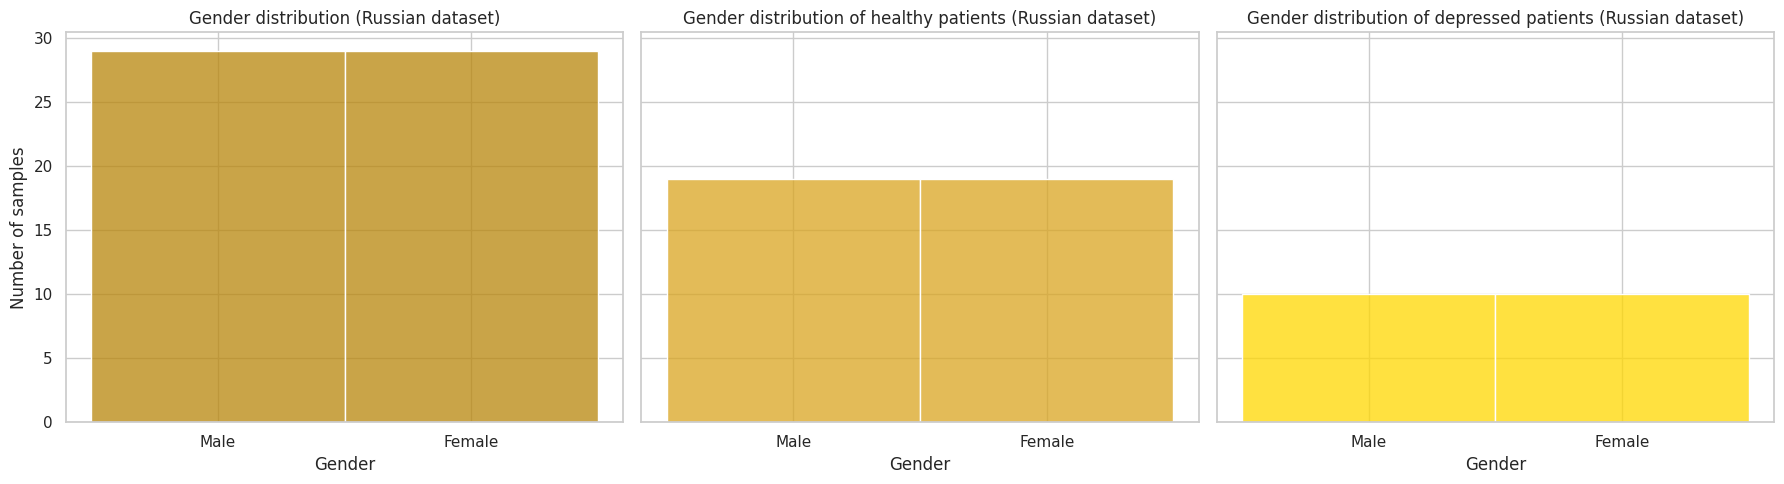

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(
    data=subset,
    x="gender",
    bins=2,
    color="darkgoldenrod",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Gender distribution (Russian dataset)")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=subset[subset["disease"] == "Healthy"],
    x="gender",
    bins=2,
    color="goldenrod",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Gender distribution of healthy patients (Russian dataset)")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=subset[subset["disease"] == "depression"],
    x="gender",
    bins=2,
    color="gold",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Gender distribution of depressed patients (Russian dataset)")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

## Age distribution

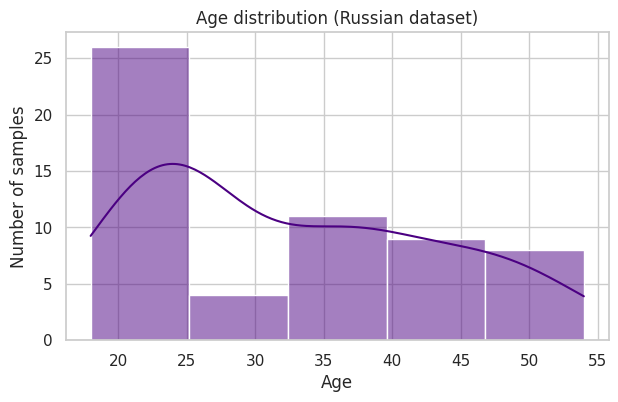

In [29]:
plt.figure(figsize=(7, 4))
sns.histplot(subset["age"], bins=5, kde=True, color="indigo")
plt.title("Age distribution (Russian dataset)")
plt.xlabel("Age")
plt.ylabel("Number of samples")
plt.show()

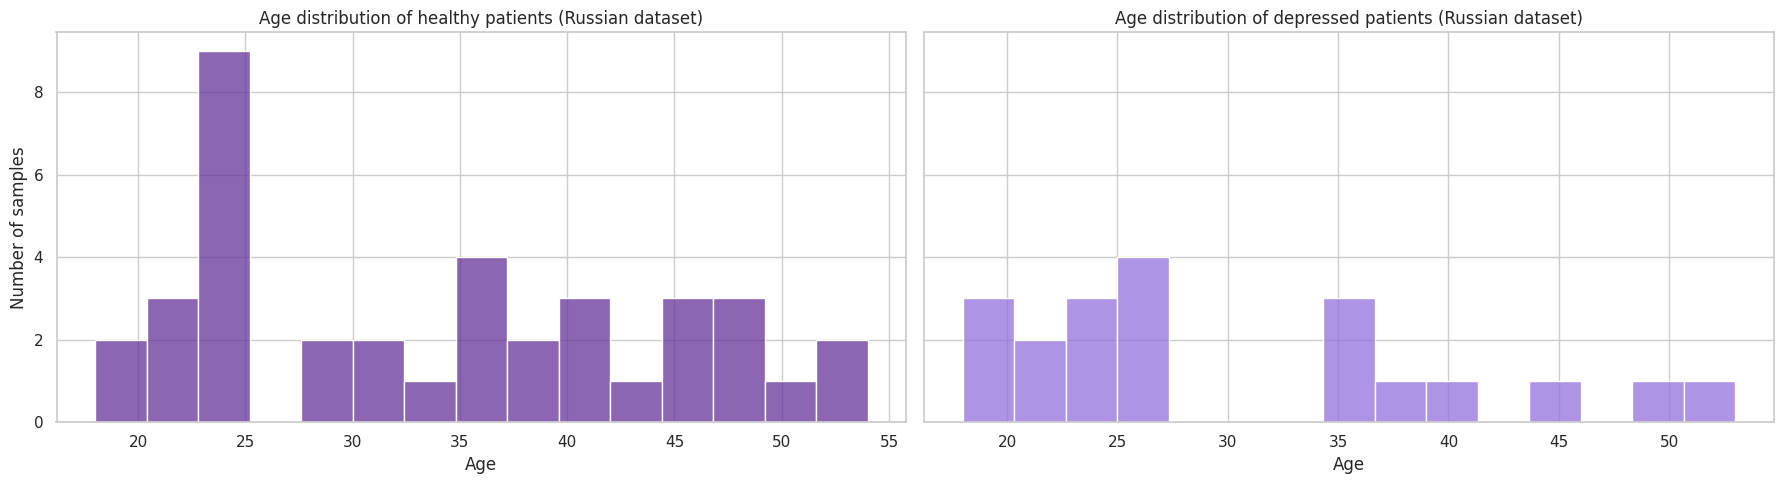

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)



#  Healthy
sns.histplot(
    data=subset[subset["disease"] == "Healthy"],
    x="age",
    bins=15,
    color="rebeccapurple",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution of healthy patients (Russian dataset)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=subset[subset["disease"] == "depression"],
    x="age",
    bins=15,
    color="mediumpurple",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of depressed patients (Russian dataset)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()

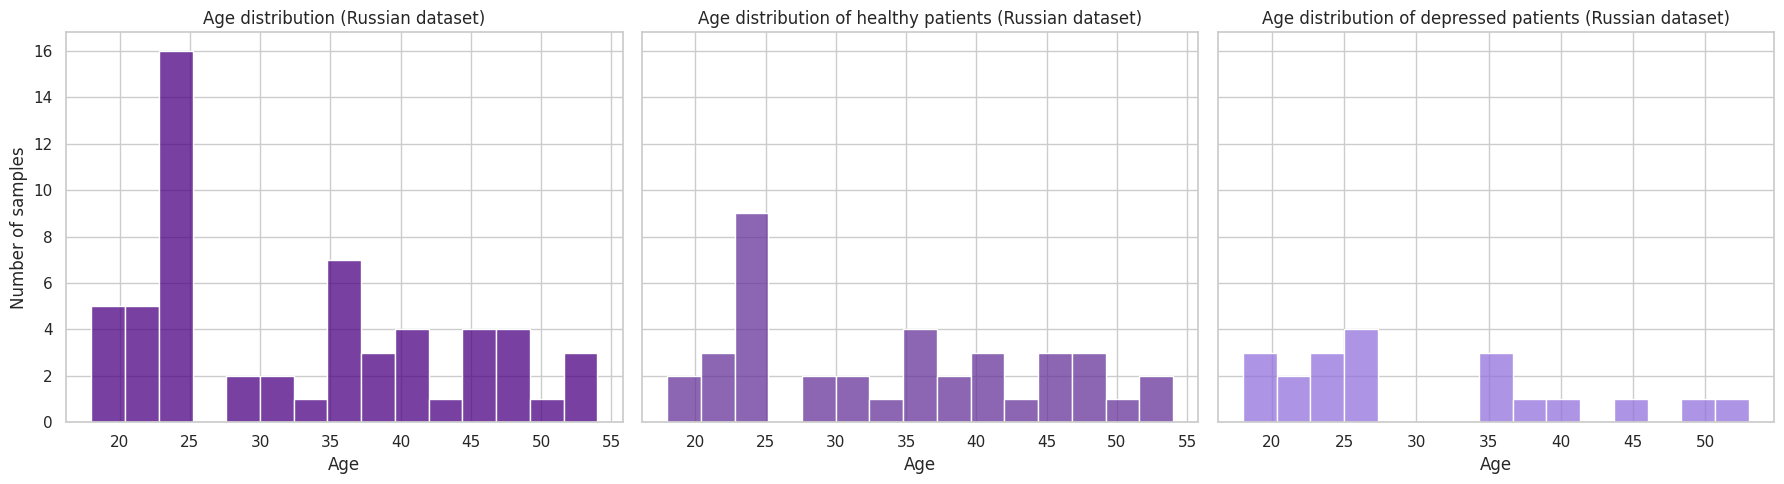

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


sns.histplot(
    data=subset,
    x="age",
    bins=15,
    color="indigo",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution (Russian dataset)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

#  Healthy
sns.histplot(
    data=subset[subset["disease"] == "Healthy"],
    x="age",
    bins=15,
    color="rebeccapurple",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of healthy patients (Russian dataset)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

#  Depression
sns.histplot(
    data=subset[subset["disease"] == "depression"],
    x="age",
    bins=15,
    color="mediumpurple",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Age distribution of depressed patients (Russian dataset)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()


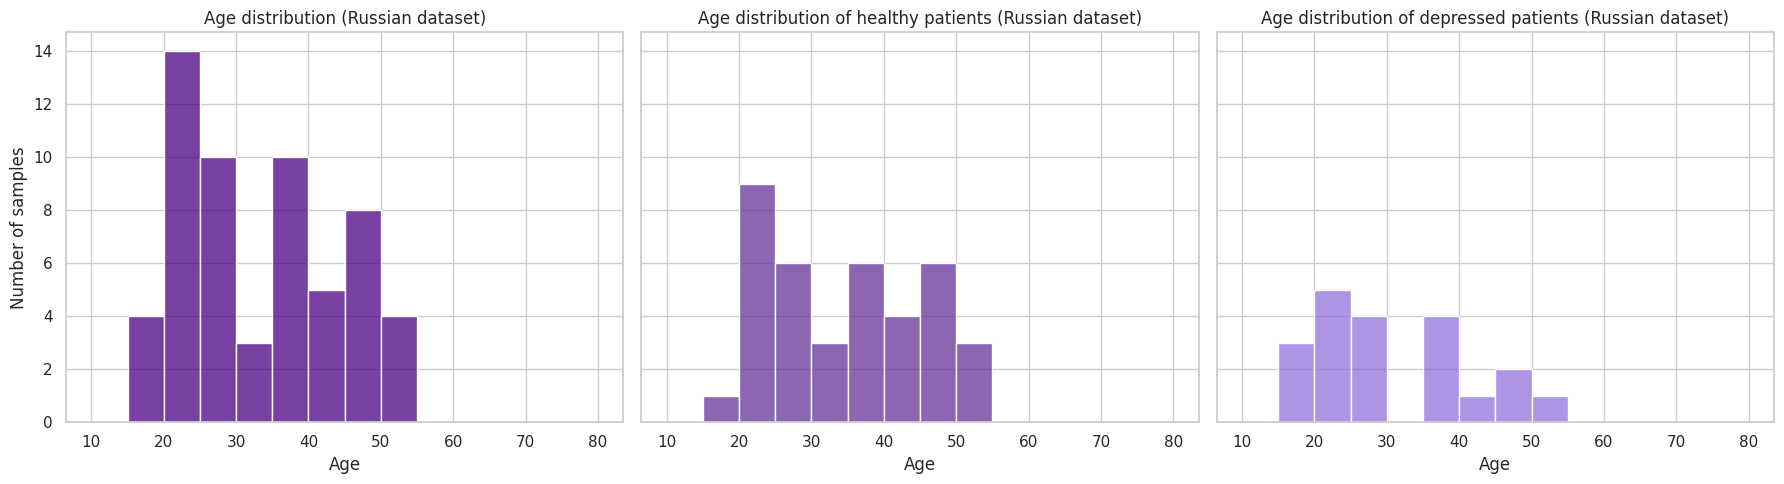

In [32]:
import numpy as np

bins = np.arange(10, 81, 5)

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Wszystkie
sns.histplot(
    data=subset,
    x="age",
    bins=bins,
    color="indigo",
    kde=False,
    ax=axes[0]
)
axes[0].set_title("Age distribution (Russian dataset)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of samples")

# Healthy
sns.histplot(
    data=subset[subset["disease"] == "Healthy"],
    x="age",
    bins=bins,
    color="rebeccapurple",
    kde=False,
    ax=axes[1]
)
axes[1].set_title("Age distribution of healthy patients (Russian dataset)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of samples")

# Depression
sns.histplot(
    data=subset[subset["disease"] == "depression"],
    x="age",
    bins=bins,
    color="mediumpurple",
    kde=False,
    ax=axes[2]
)
axes[2].set_title("Age distribution of depressed patients (Russian dataset)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of samples")

plt.tight_layout()
plt.show()


In [33]:
# Grupowanie po disease i gender
counts = subset.groupby(["disease", "gender"]).size().reset_index(name="count")

print(counts)


      disease  gender  count
0     Healthy  Female     19
1     Healthy    Male     19
2  depression  Female     10
3  depression    Male     10


## BMI distribution

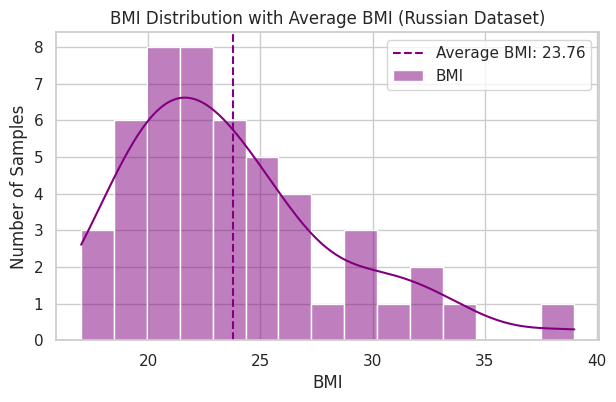

In [34]:
plt.figure(figsize=(7, 4))
sns.histplot(subset["BMI"], bins=15, kde=True, color="purple", label="BMI")

average_bmi = subset["BMI"].mean()
plt.axvline(average_bmi, color="purple", linestyle="dashed", label=f"Average BMI: {average_bmi:.2f}")

plt.title("BMI Distribution with Average BMI (Russian Dataset)")
plt.xlabel("BMI")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()

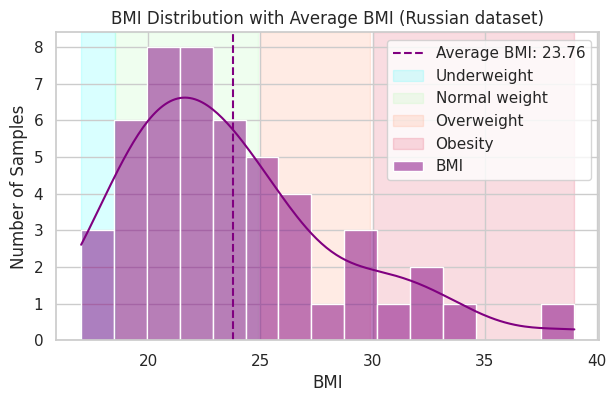

In [35]:
plt.figure(figsize=(7, 4))

# histogram
sns.histplot(subset["BMI"], bins=15, kde=True, color="purple", label="BMI")

# average BMI line
average_bmi = subset["BMI"].mean()
plt.axvline(average_bmi, color="purple", linestyle="dashed", label=f"Average BMI: {average_bmi:.2f}")

# shaded BMI ranges
plt.axvspan(subset["BMI"].min(), 18.5, color="cyan", alpha=0.15, label="Underweight", zorder=0)
plt.axvspan(18.5, 24.9, color="palegreen", alpha=0.15, label="Normal weight", zorder=0)
plt.axvspan(25, 29.9, color="coral", alpha=0.15, label="Overweight", zorder=0)
plt.axvspan(30, subset["BMI"].max(), color="crimson", alpha=0.15, label="Obesity", zorder=0)

# labels and title
plt.title("BMI Distribution with Average BMI (Russian dataset)")
plt.xlabel("BMI")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()


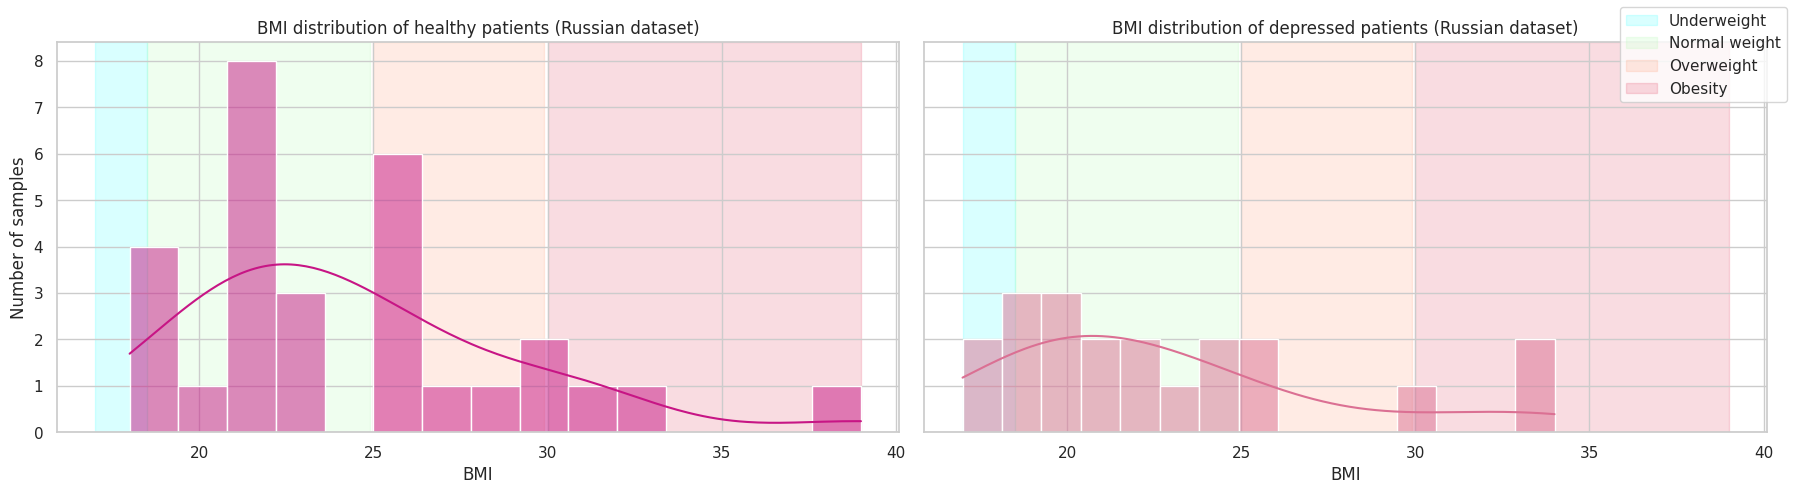

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

datasets = [
    ("BMI distribution of healthy patients (Russian dataset)", subset[subset["disease"] == "Healthy"]),
    ("BMI distribution of depressed patients (Russian dataset)", subset[subset["disease"] == "depression"])
]

colors = ["mediumvioletred", "palevioletred"]

for ax, (title, data), color in zip(axes, datasets, colors):
    # --- shaded BMI ranges pod histogramem
    ax.axvspan(subset["BMI"].min(), 18.5, color="cyan", alpha=0.15, label="Underweight", zorder=0)
    ax.axvspan(18.5, 24.9, color="palegreen", alpha=0.15, label="Normal weight", zorder=0)
    ax.axvspan(25, 29.9, color="coral", alpha=0.15, label="Overweight", zorder=0)
    ax.axvspan(30, subset["BMI"].max(), color="crimson", alpha=0.15, label="Obesity", zorder=0)

    sns.histplot(data["BMI"], bins=15, kde=True, color=color, ax=ax, zorder=1)

    ax.set_title(title)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Number of samples")

# wspólna legenda dla shaded ranges
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.show()


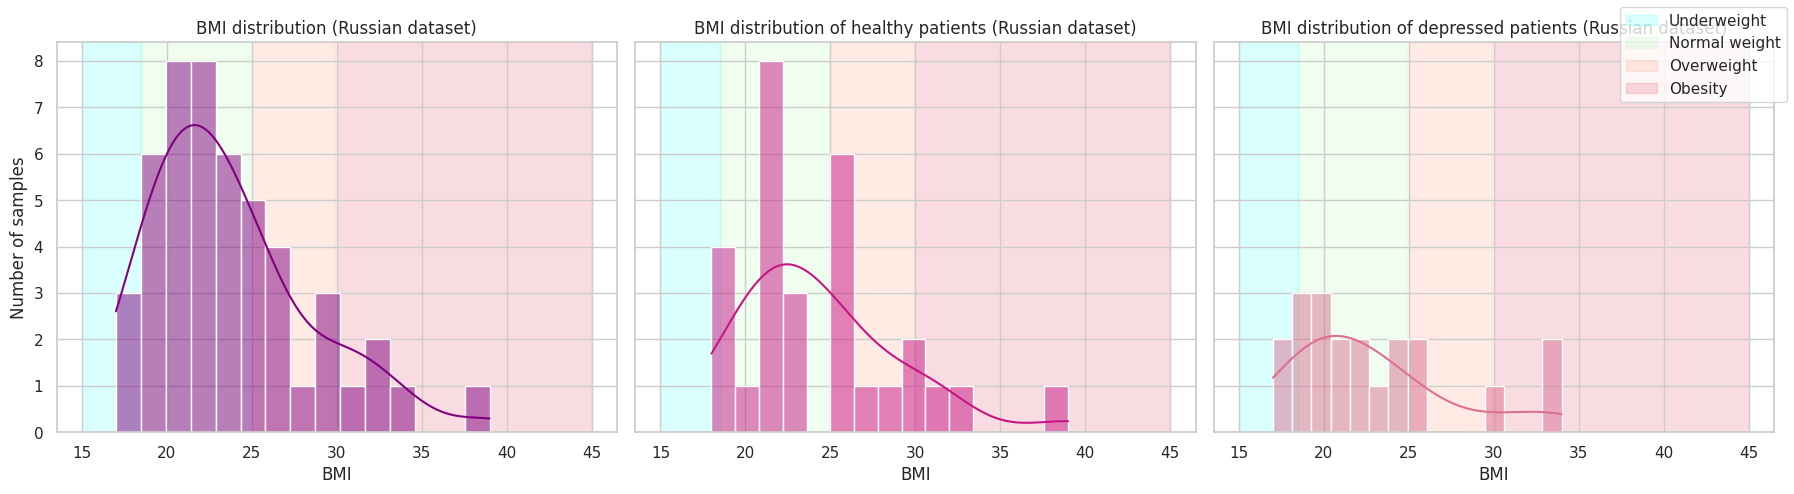

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets = [
    ("BMI distribution (Russian dataset)", subset),
    ("BMI distribution of healthy patients (Russian dataset)", subset[subset["disease"] == "Healthy"]),
    ("BMI distribution of depressed patients (Russian dataset)", subset[subset["disease"] == "depression"])
]

colors = ["purple", "mediumvioletred", "palevioletred"]

for ax, (title, data), color in zip(axes, datasets, colors):
    # --- shaded BMI ranges pod histogramem
    ax.axvspan(15, 18.5, color="cyan", alpha=0.15, label="Underweight", zorder=0)
    ax.axvspan(18.5, 24.9, color="palegreen", alpha=0.15, label="Normal weight", zorder=0)
    ax.axvspan(25, 29.9, color="coral", alpha=0.15, label="Overweight", zorder=0)
    ax.axvspan(30, 45, color="crimson", alpha=0.15, label="Obesity", zorder=0)

    sns.histplot(data["BMI"], bins=15, kde=True, color=color, ax=ax, zorder=1)

    ax.set_title(title)
    ax.set_xlabel("BMI")
    ax.set_ylabel("Number of samples")

# wspólna legenda dla shaded ranges
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.show()


## Study condition distribution

/tmp/ipykernel_767224/1999018435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=subset["disease"], palette="pastel", order=subset["disease"].value_counts().index)


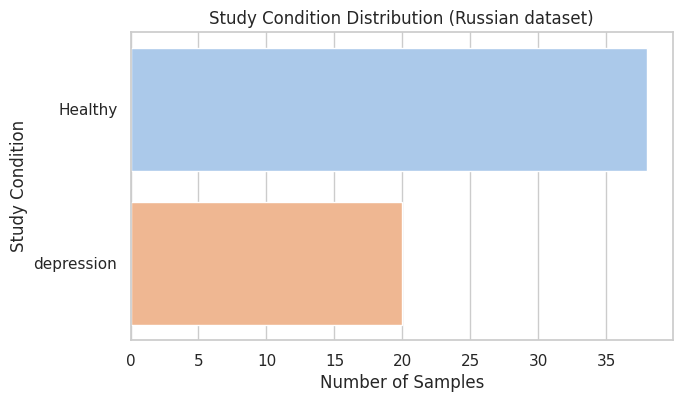

In [38]:
plt.figure(figsize=(7, 4))
sns.countplot(y=subset["disease"], palette="pastel", order=subset["disease"].value_counts().index)
plt.title("Study Condition Distribution (Russian dataset)")
plt.xlabel("Number of Samples")
plt.ylabel("Study Condition")
plt.show()

## Age Comparison Across Study Conditions

/tmp/ipykernel_767224/1128836118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=subset, palette="pastel", order=["depression", "Healthy"])


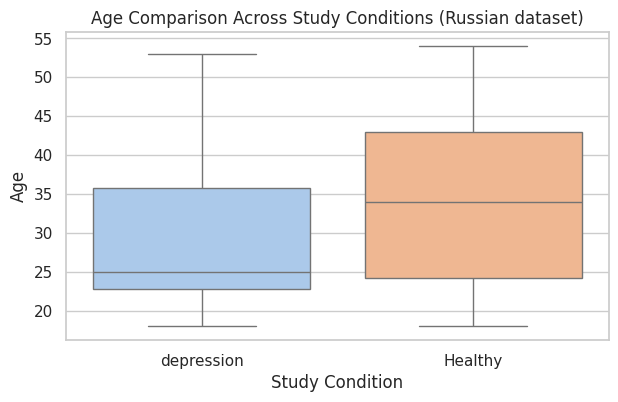

In [39]:
plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=subset, palette="pastel", order=["depression", "Healthy"])
plt.title("Age Comparison Across Study Conditions (Russian dataset)")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

## Correlation Analysis

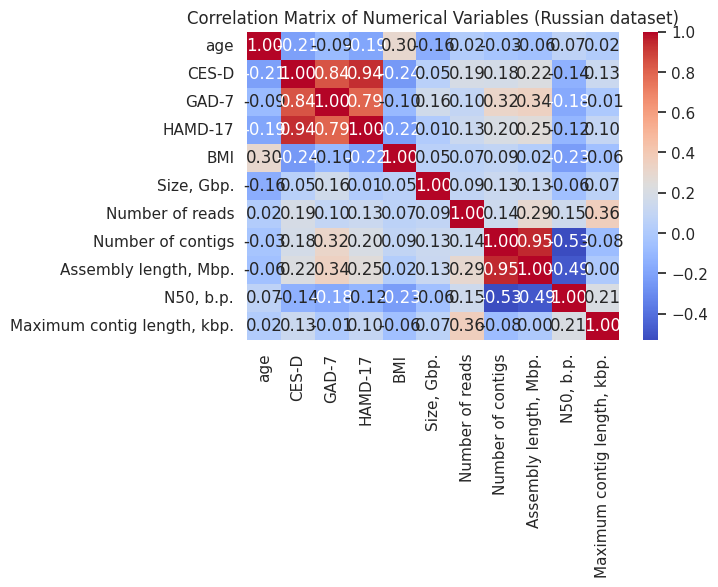

/tmp/ipykernel_767224/3604991687.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="BMI", data=subset, palette="pastel", order=["depression", "Healthy"])


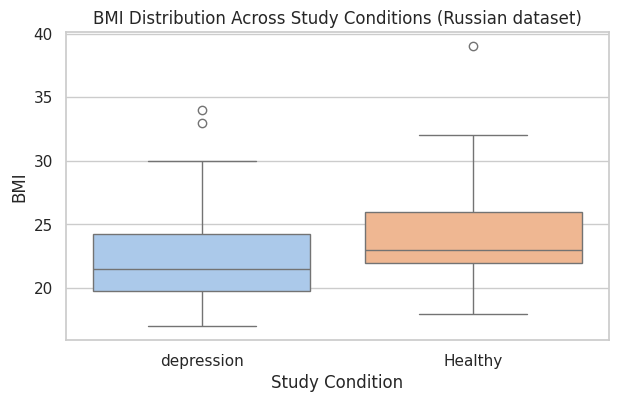

/tmp/ipykernel_767224/3604991687.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=subset, palette="pastel", order=["depression", "Healthy"])


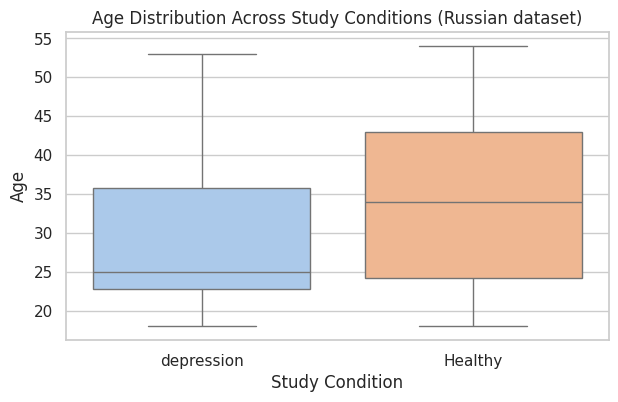

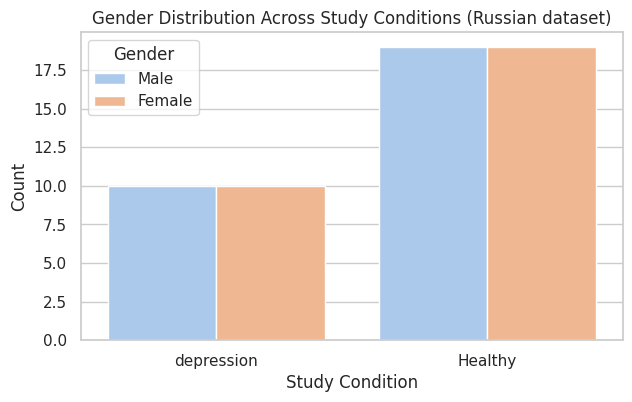

In [40]:
correlation_matrix = subset.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables (Russian dataset)")

plt.show()

# Health condition correlation analysis
plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="BMI", data=subset, palette="pastel", order=["depression", "Healthy"])
plt.title("BMI Distribution Across Study Conditions (Russian dataset)")
plt.xlabel("Study Condition")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x="disease", y="age", data=subset, palette="pastel", order=["depression", "Healthy"])
plt.title("Age Distribution Across Study Conditions (Russian dataset)")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

if "gender" in subset.columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x="disease", hue="gender", data=subset, palette="pastel", order=["depression", "Healthy"])
    plt.title("Gender Distribution Across Study Conditions (Russian dataset)")
    plt.xlabel("Study Condition")
    plt.ylabel("Count")
    plt.legend(title="Gender")
    plt.show()
    
# if "disease" in imsms.columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=rmetadata["disease"], palette="pastel", order=rmetadata["disease"].value_counts().index)
#     plt.title("Disease Distribution")
#     plt.xlabel("Number of Samples")
#     plt.ylabel("Disease")
#     plt.show()